<table width = "100%">
  <tr style="background-color:white;">
    <!-- QWorld Logo -->
    <td style="text-align:left;width:200px;"> 
        <a href="https://qworld.net/" target="_blank"><img src="../images/QWorld.png"> </a></td>
    <td style="text-align:right;vertical-align:bottom;font-size:16px;"> 
        Prepared by <a href="https://gitlab.com/sabahuddin.ahmad" target="_blank"> Sabah Ud Din Ahmad </a> and Özlem Salehi</td>
    </tr> 
 </table>
 
<hr>

# QUBO Formulation for TSP

In the previous section, we learnt about the penalty method for constrained problems. Now, lets apply it to some important constrained optimization problems. 

## Travelling Salesman Problem (TSP)

Recall that given a set of cities and corresponding distances between each pair of cities, the problem is to find the shortest possible route such that a salesman visits every city exactly once and returns to the starting point. So, eventually, the salesman maximizes his sales by minimizng the total cost of travelling between the nodes. 

A path through a graph that visits each node (city) exactly once is called a Hamiltonian path or a **Hamiltonian cycle** if it is returning back to the starting point. So, we will find the Hamiltonian cycle with the smallest total cost given a graph $G = (V,E)$ with $N$ nodes and costs $w_{ij}$ (cost of travelling from node $i$ to node $j$). Here $V =\{0,\dots,N-1\}$ is the set of nodes and $E$ is the edge set. 

We are assuming that $G$ is a complete directed graph. If $G$ is not complete, then $w_{ij}$ for the corresponding edge can be set to a very large value to make sure that it never appears in the solution. If $G$ is not directed, then simply the costs $w_{ij}$ and $w_{ji}$ will be equal to each other.

### Binary variables

We will define $N^2$ binary decision variables $x_{i,t}$, where $i$ represents the node and $t$ represents the time point node is visited.

$$x_{i,t}=
\left\{
\begin{array}{ll} 
      1, & \text{node $i$ is visited at time point $t$} \\
      0, & \text{otherwise} \\
\end{array}
\right.$$


for $i=0,\dots,N-1$ and $t=0,\dots,N-1$.

<div class="alert alert-block alert-info">
Note that both indices start at $0$.
</div>



### Constraints

Note that by the problem definition, the tour we are considering should obey some constraints: 
- Each node should be visited exactly once
- Only a single node is visited at each time point.

Mathematically, we will express those constraints as follows:

1. Each node should be visited exactly once:

$$\sum_{t=0}^{N-1} x_{i,t} = 1 \;\;\;\;\; \forall i.$$

Note that for each node, we are taking a summation over all time points $t$ and we want the summation to equal 1. 

The equivalent penalty is,
$$P \cdot \sum_{i=0}^{N-1} \left(1-\sum_{t=0}^{N-1}x_{i,t}\right)^2$$

2. Only a single node is visited at each time point:

$$\sum_{i=0}^{N-1} x_{i,t} = 1 \;\;\;\;\; \forall t.$$

Note that for each time point, we are taking a summation over all nodes $i$ and we want the summation to equal 1.

The equivalent penalty is,
$$P \cdot \sum_{t=0}^{N-1} \left(1-\sum_{i=0}^{N-1}x_{i,t}\right)^2$$


### Cost of the tour

We would like to minimize the total cost of the tour, which will be a part of our objective function. We should express the total cost of the route using the binary variables $x_{i,t}$.

$$\sum_{ \substack{i,j=0\\i\neq j}}^{N-1}w_{ij} \sum_{t=0}^{N-1} x_{i,t} x_{j,t+1}$$


Whenever both variables $x_{i,t}$ and $x_{j,t+1}$ are equal to 1, then the cost $w_{ij}$ is included in the summation.

We assume that $x_{i,N} = x_{i,0}$ and $w_{ij} x_{i,N-1} x_{j,0}$ corresponds to the cost of returning back to the origin city from the last visited city.

### QUBO for TSP

Now let us bring together the constraints and the objective function.

$$H(x) = P \cdot \sum_{t=0}^{N-1} \left(1-\sum_{i=0}^{N-1}x_{i,t}\right)^2 + P \cdot \sum_{i=0}^{N-1} \left(1-\sum_{t=0}^{N-1}x_{i,t}\right)^2 + \sum_{ \substack{i,j=0\\i\neq j}}^{N-1} w_{ij} \sum_{t=0}^{N-1} x_{i,t} x_{j,t+1} $$

$P$ is chosen so that $0<\max_{i,j} \{w_{ij}\}<P$.


<a id="example"></a>
### Worked out example

Let's assume we have the following graph $G$ with 3 nodes/cities and 3 edges. 

<img src="../images/tsp_3.png" width="250">


$$H(x) =  P \cdot \sum_{t=0}^{2} \left(1-\sum_{i=0}^{2}x_{i,t}\right)^2 + P \cdot \sum_{i=0}^{2} \left(1-\sum_{t=0}^{2}x_{i,t}\right)^2 + \sum_{ \substack{i,j=0\\i\neq j}}^2 w_{ij} \sum_{t=0}^{2} x_{i,t} x_{j,t+1} $$

$$ =  P \cdot \sum_{t=0}^{2} \left(1 - (x_{0,t}+x_{1,t}+x_{2,t})\right)^2 + 
P \cdot \sum_{i=0}^{2} \left(1-(x_{i,0}+x_{i,1}+x_{i,2})\right)^2 + 
\sum_{ \substack{i,j=0\\i\neq j}}^2 w_{ij} (x_{i,0}x_{j,1} + x_{i,1}x_{j,2} + x_{i,2}x_{j,0}) $$

Let us determine the $Q$ matrix for the given graph for soving TSP problem.

#### First term

Let's look at the first term.
$$P \cdot\sum_{t=0}^{2} \left(1 - (x_{0,t}+x_{1,t}+x_{2,t})\right)^2$$
Expanding the sum we obtain,
$$P \cdot \left[\left(1 - (x_{0,0}+x_{1,0}+x_{2,0})\right)^2+\left(1 - (x_{0,1}+x_{1,1}+x_{2,1})\right)^2+\left(1 - (x_{0,2}+x_{1,2}+x_{2,2})\right)^2\right]$$ 

Let us check $\left(1 - (x_{0,0}+x_{1,0}+x_{2,0})\right)^2$. 

We will use the identity $$(a+b+c+d)^2 = a^2+b^2+c^2+d^2+2ab+2ac+2ad+2bc+2bd+2cd$$.

$$ 
\left(1 - x_{0,0}-x_{1,0}-x_{2,0}\right)^2= 
1 + x_{0,0}^2 +x_{1,0}^2 +x_{2,0}^2  -2x_{0,0} -2x_{1,0}-2x_{2,0} + 2x_{0,0}x_{1,0}+2x_{0,0}x_{2,0} +  2x_{1,0}x_{2,0}
$$


This can be simplified by replacing the quadratic terms $x_{i,t}^2$ by $x_{i,t}$.

$$ 
= 1 - x_{0,0} -x_{1,0} -x_{2,0} + 2x_{0,0}x_{1,0}+2x_{0,0}x_{2,0} +  2x_{1,0}x_{2,0}
$$




Note that each term $x_{i,0}$ is appearing once with the coefficient -1 and we have all possible combinations of $x_{i,0}$ as quadratic terms with coefficient +2. In addition, we have a constant of +1. 

The same structure will be valid for $\left(1 - (x_{0,1}+x_{1,1}+x_{2,1})\right)^2 $ and $\left(1 - (x_{0,2}+x_{1,2}+x_{2,2})\right)^2$.

So for the first term we have the following:
- Each $x_{i,t}$ appears with coefficient $-P$
- For each fixed $t$, all possible 2-combinations of $x_{i,t}$ appears with coefficient $2P$
- There is a constant coefficeint of $NP$

#### Second term

Let's look at the second term.
$$P \cdot\sum_{i=0}^{2} \left(1 - (x_{i,0}+x_{i,1}+x_{i,2})\right)^2$$
Expanding the sum we obtain,
$$P \cdot \left[\left(1 - (x_{1,0}+x_{1,1}+x_{1,2})\right)^2+\left(1 - (x_{2,0}+x_{2,1}+x_{2,2})\right)^2+\left(1 - (x_{3,0}+x_{3,1}+x_{3,2})\right)^2\right]$$

### Task 1

Verify the following observations for the second term:

- Each $x_{i,t}$ appears with coefficient $-P$
- For each fixed $i$, all possible 2-combinations of $x_{i,t}$ appears with coefficient $2P$
- There is a constant coefficeint of $NP$

[click here for solution](QUBO_Examples_TSP_Solutions.ipynb#task1)

#### Third term

Let's look at the third term.

$$\sum_{ \substack{i,j=0\\i\neq j}}^2 w_{ij} (x_{i,0}x_{j,1} + x_{i,1}x_{j,2} + x_{i,2}x_{j,0})$$

There are 6 possible $i,j$ pairs $(0,1),(0,2),(1,0),(1,2),(2,0),(2,1)$ and overall the summation takes the following form:
$$w_{01} (x_{0,0}x_{1,1} + x_{0,1}x_{1,2} + x_{0,2}x_{1,0})+ w_{02} (x_{0,0}x_{2,1} + x_{0,1}x_{2,2} + x_{0,2}x_{2,0})+ \dots +w_{2,1} (x_{2,0}x_{1,1} + x_{2,1}x_{1,2} + x_{2,2}x_{1,0}).$$

So we can conclude that 
- Each $x_{i,t} x_{j,t+1}$ appears with the coeeficient $w_{ij}$


#### Overall

Now let's bring together the 3 terms also taking into account the penalty coefficient.

- Each $x_{i,t}$ appears with coefficient $-2P$.
- For each fixed $t$, all possible 2-combinations of $x_{i,t}$ appears with coefficient $2P$.
- For each fixed $i$, all possible 2-combinations of $x_{i,t}$ appears with coefficient $2P$.
- Each $x_{i,t} x_{j,t+1}$ appears with the coeeficient $w_{ij}$.
- There is a constant coefficient of $2NP$.

Note that we can omit the constant coefficient during the minimization process as it has no impact.

### $Q$ matrix for the TSP problem

Suppose that the rows and columns of the $Q$ matrix are labeled in the following order:

$x_{0,0},x_{0,1},x_{0,2},x_{1,0},\dots, x_{2,2}$.


Consider a row corresponding to $x_{i,t}$. 

- As each $x_{i,t}$ has coefficient of $-2P$, so all diagonals are $-2P$.

- All the entries whose corresponding column shares a common $i$ or $t$ will have a coefficient $2P$, with the condition that the matrix is upper triangular.

- All the entries whose corresponding column is labeled with $x_{j,t+1}$ will have coefficient $w_{ij}$, with the condition that the matrix is upper triangular.

Hence, we have the following $9 \times 9$ matrix $Q$:

$$Q=
\begin{pmatrix}
       &x_{0,0} &x_{0,1}&x_{0,2}&x_{1,0}&x_{1,1}&x_{1,2}&x_{2,0}&x_{2,1} &x_{2,2} \\
x_{0,0}&-2P     &2P     & 2P     & 2P    & w_{01}& w_{10}     & 2P     & w_{02}  & w_{20}\\
x_{0,1}&0       &-2P    & 2P     & w_{10}& 2P     & w_{01}& w_{20}     & 2P      & w_{02}\\
x_{0,2}&0       & 0     &  -2P   & w_{01}& w_{10} & 2P& w_{02}  & w_{20}& 2P      &\\
x_{1,0}&0       & 0     &0       & -2P   & 2P     & 2P     & 2P     & w_{12}&w_{21}    \\
x_{1,1}&0       & 0     &0       & 0     & -2P   & 2P     & w_{21}  & 2P     & w_{12}      \\
x_{1,2}&0       & 0     &0       & 0     &  0     & -2P   & w_{12}& w_{21}     & 2P      \\
x_{2,0}&0       & 0     &0       & 0     &   0    & 0     & -2P  & 2P    & 2P      \\
x_{2,1}&0       & 0     &0       & 0     &    0   & 0     & 0  & -2P    & 2P      \\
x_{2,2}&0       & 0     &0       & 0     &     0  & 0     & 0  & 0    & -2P      \\
\end{pmatrix}$$


So, our task is to find the binary vector $x$ that mininizes $x^TQx + 6P$. We will find the binary vector that minimizes $x^TQx$ instead as $6P$ is constant.

The constant coefficient is also called the *offset*.

### Task 2

You are given the weights $w_{ij}$ as a cost matrix in the following cell. Assuming $P=20$, create the above $Q$ matrix using numpy. Use the `qubo_solver` defined previously to find the vector $x$ that minimizes $x^TQx$.

In [ ]:
# Access the qubo_solver() function
%run qubo_functions.py

In [ ]:
import numpy as np

W = np.array([[0,10,7],
             [15,0,9],
             [14,8,0]])

In [ ]:
# Set P
P = 20

# Define Q matrix


In [ ]:
qubo_solver(Q)

[click here for solution](QUBO_Examples_TSP_Solutions.ipynb#task2)

### Interpreting the solution

The solution to the above TSP instance is the vector $(1, 0, 0, 0, 0, 1, 0, 1, 0)$. Recall that we have considered the binary variables in the order $x_{0,0},x_{0,1},x_{0,2},x_{1,0},\dots, x_{2,2}$. Hence, from the vector we get that

- $x_{0,0}=1,$
- $x_{1,2}=1,$
- $x_{2,1}=1.$

Note that for each $t$ we have exactly one $i$ value for which $x_{i,t}=1$ and vice versa. At $t=0$, node 0 is visited, at $t=1$, node 2 is visited and at $t=2$, node 1 is visited.

We can conclude that the tour with the minimum cost is $0-2-1-0$.

The objective value returned by the function is -90. Recall that we had an offset of $6P$, which is equal to 120 in this case. Hence, the solution is

$$
x^TQx + 6P =  -90 + 120 = 30
$$

which corresponds to the cost of the tour $0-2-1-0$.

<div class="alert alert-block alert-info">
You can verify that 30 is the cost of the tour also by adding the cost of the edges $(0-2), (2-1), (1-0)$ which is $7+8+15 = 30$.

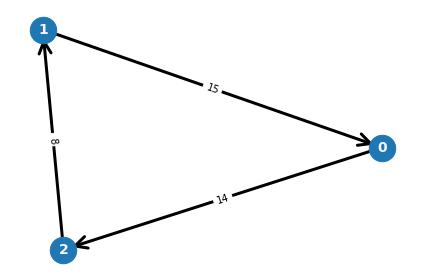

In [5]:
from bqm_utils import tsp_viz
import networkx as nx

G = nx.Graph()
G.add_weighted_edges_from(
    [(0, 1, 10), (1, 0, 15), (0, 2, 7), (2, 0, 14), (1, 2, 9), (2, 1, 8)]
)
path = [0,2,1]
tsp_viz(G,path)

### Task 3 (Optional)


Create the above matrix $Q$ using numpy and for loops instead of hardcoding the values. Create a function that takes as parameter the number of cities $n$, the cost matrix $W$ and penalty value $P$ and returns $Q$. Verify that you obtain the same matrix as in Task 2.

Hint:
- Set the diagonals
- Set the entries sharing same time index
- Set the entries sharing same node
- Set the entries for consecutive time points

In [ ]:
def tsp_matrix(n, W, P):
    # Initialize an empty matrix
    Q = np.zeros((n*n,n*n))
    for i in range(n*n):
        for j in range(i,n*n):
        # Your code here
    return Q        

In [ ]:
Q1 = tsp_matrix(n, W)
np.array_equal(Q1,Q)

[click here for solution](QUBO_Examples_TSP_Solutions.ipynb#task3)

### Task 4 (Optional)

Let's assume we have the following fully-connected, undirected graph $G$ of 4 nodes/cities and 6 edges. 

<img src="../images/tsp_1.png" width="250">

Using the function you created in Task 3, obtain matrix $Q$ for the given graph and use the `qubo_solver` defined previously to find the vector $x$ that minimizes $x^TQx$. Interpret the result.

In [ ]:
# Access the qubo_solver() function
%run qubo_functions.py

In [ ]:
import numpy as np

#define W



In [ ]:
# Set P
P = 30
# Set n
n = 4
# Obtain Q matrix


In [ ]:
qubo_solver(Q)

[click here for solution](QUBO_Examples_TSP_Solutions.ipynb#task4)

### Task 5 (Optional)

Let's assume we have the following fully-connected, undirected graph $G$ of 4 nodes/cities and 6 edges. 

<img src="../images/tsp_2.png" width="250">

Using the function you created in Task 3, obtain matrix $Q$ for the given graph and use the `qubo_solver` defined previously to find the vector $x$ that minimizes $x^TQx$. Interpret the result.


Note: You may not be able to solve it depending on your computer's performance.

In [ ]:
# Access the qubo_solver() function
%run qubo_functions.py

In [ ]:
import numpy as np

#define W



In [ ]:
# Set P
P = 30
# Set n
n = 4
# Obtain Q matrix


In [ ]:
qubo_solver(Q)

[click here for solution](QUBO_Examples_TSP_Solutions.ipynb#task5)


<div class="alert alert-block alert-info">
If you are able to solve this task, you will notice that `qubo_solver` is taking significantly a larger amount of time.
<div>


---

### Fixing initial and final node

In order to simplify the algebraic expressions for a particular graph, we can have a specific case where the initial and final node is fixed. This reduces the number of variables. 

Consider again the graph we had defined with 3 nodes.

<img src="../images/tsp_3.png" width="250">


Consider the tour 0-1-2-0. This is the same tour as 1-2-0-1 in principal and there are 3 different tours corresponding to the same tour. The starting node of the tour does not have an impact on the solution and one can fix the starting node to simplify the QUBO by getting rid of some of the variables.

For instance, if we fix that 0 is the first visited node, then we know that $x_{0,0}=1$ and we don't need to define any binary variable that has node 0 or time point 0 as its index. This reduces the number of required variables from $n^2$ to $(n-1)^2$. 

The QUBO formulation takes the following form:

$$H(x) = P \cdot \sum_{t=1}^{N-1} \left(1-\sum_{i=1}^{N-1}x_{i,t}\right)^2 + P \cdot \sum_{i=1}^{N-1} \left(1-\sum_{t=1}^{N-1}x_{i,t}\right)^2 + \sum_{j=1}^N w_{0j}x_{j,1} + \sum_{ \substack{i,j=1\\i\neq j}}^{N-1} w_{ij} \sum_{t=1}^{N-2} x_{i,t} x_{j,t+1} + \sum_{i=1}^N w_{i0}x_{i,N-1} $$

$P$ is chosen so that $0<\max_{i,j} \{w_{ij}\}<P$.


### Task 6

Assuming that node 0 is the first node in the tour, obtain the new $4\times4$ matrix $Q$ for the above graph. Create a numpy matrix and find the vector that minimizes $x^TQx$ using the `qubo_solver` function. Interpret the result.

$$Q=
\begin{pmatrix}
       &x_{1,1}   &x_{1,2}    &x_{2,1}     & x_{2,2}   \\
x_{1,1}&-2P+w_{01}& 2P        & 2P         & w_{12}    \\
x_{1,2}&  0       & -2P+w_{10}& w_{21}     & 2P        \\
x_{2,1}& 0        & 0         & -2P+w_{02} & 2P        \\
x_{2,2}& 0        & 0         & 0          & -2P+w_{20}\\
\end{pmatrix}$$


In [ ]:
# Access the qubo_solver() function
%run qubo_functions.py

In [ ]:
import numpy as np

W = np.array([[0,10,7],
             [15,0,9],
             [14,8,0]])

In [ ]:
# Set P
P = 20

# Define Q matrix





In [ ]:
qubo_solver(Q)

[click here for solution](QUBO_Examples_TSP_Solutions.ipynb#task6)

***
### References

1. Qiskit Tutorials. (n.d.). *Max-Cut and Traveling Salesman Problem.* Qiskit. [Link](https://qiskit.org/documentation/optimization/tutorials/06_examples_max_cut_and_tsp.html) 
2. Andrew Lucas. (2014). *Ising formulations of many NP problems.* Frontiers in Physics, Volume 2, Article 5. [Link](https://doi.org/10.3389/fphy.2014.00005)
3. Ozlem Salehi, & Adam Glos, & Jaroslaw Adam Miszczak. (2021). *Unconstrained Binary Models of the Travelling Salesman Problem Variants for Quantum Optimization.* Quantum Information Processing 21.2 (2022): 1-30. [[Link]](https://arxiv.org/abs/2106.09056)